## Introduction to NumPy, SciPy, and Matplotlib

[Numpy](https://numpy.org/) is an essential Python package for carrying out calculations that are fundamental in many areas of scientific computing.  [SciPy](https://scipy.org/) is a library that integrates the fundamental data structures of Numpy into modules that contain tools for specific areas linear algebra, optimization, integration, and statistics  [Matplotlib](https://matplotlib.org/) is a extensive Python package for producing a wide variety of quality plots.  All of these packages are installed and available on Syzygy.  In this notebook we will demonstrate just a few of the basic elements needed to get started.  

### NumPy Arrays

Although it is possible to represent an matrices using lists of lists, NumPy has a powerful way to represent arrays, and has many built-in tools for processing them efficiently.  To use Numpy, we must first import it.  This time we will use the code $\texttt{import numpy as np}$, which imports the module but gives it a different name, called an alias, that is more convenient to type. 

In [88]:
import numpy as np

There are several ways we might create arrays depending on the circumstance.  Let's for example that we want to represent the following $2\times 2$ matrix.

\begin{equation}
\left[ \begin{array}{rrrr} 5 & -1 & 1 & 0 \\ 4 & 3 & 12 & -6 \end{array}\right]
\end{equation}


The easiest way create small specific arrays is to use the $\texttt{array}$ function, and provide it a list of lists which represent the rows of the array.  

In [89]:
## The object [[5, -1, 1, 0],[4, 3, 12, -6]], which gets passed into the array function is a list of lists.
## The object returned by the array function is a NumPy array object.

A = np.array([[5, -1, 1, 0],[4, 3, 12, -6]])
print(A)

[[ 5 -1  1  0]
 [ 4  3 12 -6]]


In order to access individual entries in an array, we use a pair of indices to refer to the row and column of the entry we are accessing.  

In [90]:
print(A[0,2])

1


If we want to build up an array element by element, we could initialize an array full of zeros, and then assign each element individually.

In [91]:
A = np.zeros((2,4))
A[0,0] = 5
A[0,1] = -1
## Carry on to fill up the array
print(A)

[[ 5. -1.  0.  0.]
 [ 0.  0.  0.  0.]]


Numpy arrays have methods, just as lists and other objects have methods.  Another way we might create the array above is to first make an array that a single row, and then use the $\texttt{reshape}$ method.  This can be more convenient than typing the extra square brackets, but it can also be handy to build arrays from other arrays. 

In [92]:
B = np.array([5, -1, 1, 0, 4, 3, 12, -6])
print("This is B:")
print(B)

C = B.reshape((2,4))
print("This is C, which is the entries of B formed into a new shape:")
print(C)

This is B:
[ 5 -1  1  0  4  3 12 -6]
This is C, which is the entries of B formed into a new shape:
[[ 5 -1  1  0]
 [ 4  3 12 -6]]


Arrays also have an **attribute** called $\texttt{shape}$, which can be used to look up the dimensions of a given array.  Another way to reshape $B$ is to change the value of the $\texttt{shape}$ attribute directly.

In [93]:
B.shape = (2,4)
print(B)

[[ 5 -1  1  0]
 [ 4  3 12 -6]]


We will often wish to make modifications to an array while keeping a copy of the original.  In this situation we can duplicate an existing array with the $\texttt{copy}$ function.

In [94]:
D = np.copy(A)
print(D)

[[ 5. -1.  0.  0.]
 [ 0.  0.  0.  0.]]


**Important:** Using the assignment operation $(=)$ does **not** create a copy.  It only attaches an additional name to the same object.  This is often not causes effects that we did not intend.

In [95]:
## If we set D "equal to A", what we get is one object with two names.
D = A
print('D',D,'A',A,sep='\n')

## When we change one we change both.
D[0,0] = 88
print('D',D,'A',A,sep='\n')

D
[[ 5. -1.  0.  0.]
 [ 0.  0.  0.  0.]]
A
[[ 5. -1.  0.  0.]
 [ 0.  0.  0.  0.]]
D
[[88. -1.  0.  0.]
 [ 0.  0.  0.  0.]]
A
[[88. -1.  0.  0.]
 [ 0.  0.  0.  0.]]


Sometimes it is useful to define an array as a portion of an existing array.  We can do this with an operation called *slicing*.

In [96]:
## E is the first row of D
## Note that in this scenario E actually becomes a 1d array rather than a 2d array
## To access the elements, we should use E[k] rather than E[0,k]
E = D[0,:]
print('E\n',E,'\n')

## F is the first two columns of D
F = D[:,0:2]
print('F\n',F,'\n')

E
 [88. -1.  0.  0.] 

F
 [[88. -1.]
 [ 0.  0.]] 



We can also generate a random array of numbers using the $\texttt{rand}$ function, which is part of the $\texttt{random}$ module.  Providing two arguments to $\texttt{rand}$ will cause it to return an array with those dimensions with entries from a uniform distribution on $[0,1]$.  Note that we need do use the dot notation twice in this case since $\texttt{rand}$ is a function in the $\texttt{random}$ module.

In [97]:
X = np.random.rand(3,2)
print(X)

[[0.60228651 0.3384407 ]
 [0.04724712 0.46838662]
 [0.97649884 0.28240346]]


If we supply $\texttt{rand}$ with no arguments, it returns a single value.

In [98]:
print(np.random.rand())

0.642625284495253


If we want to generate random integers, we can use the $\texttt{randint}$ function.  This function requires a minimum of one argument to specify an upper bound on the numbers produced.  The code below produces a random number from among the integers 0 to 9.  

In [99]:
print(np.random.randint(10))

9


To generate a random array we have to specify the number of rows and columns using a *keyword argument* called $\texttt{size}$.  The use of a *keyword argument* requires slightly different syntax as shown in the following example.

In [100]:
Y = np.random.randint(10,size=(3,6))
print(Y)

[[0 3 0 7 3 0]
 [2 7 1 7 3 7]
 [4 9 3 6 0 0]]


The $\texttt{random}$ module also includes functions for generating random numbers (or arrays) based on common distributions.  Again we can view available functions by printing the directory of the module, or view information on how to use specific functions by printing their docstrings.  

In [101]:
print(dir(np.random))

['BitGenerator', 'Generator', 'MT19937', 'PCG64', 'Philox', 'RandomState', 'SFC64', 'SeedSequence', '__RandomState_ctor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_bounded_integers', '_common', '_generator', '_mt19937', '_pcg64', '_philox', '_pickle', '_sfc64', 'beta', 'binomial', 'bit_generator', 'bytes', 'chisquare', 'choice', 'default_rng', 'dirichlet', 'exponential', 'f', 'gamma', 'geometric', 'get_state', 'gumbel', 'hypergeometric', 'laplace', 'logistic', 'lognormal', 'logseries', 'mtrand', 'multinomial', 'multivariate_normal', 'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal', 'pareto', 'permutation', 'poisson', 'power', 'rand', 'randint', 'randn', 'random', 'random_integers', 'random_sample', 'ranf', 'rayleigh', 'sample', 'seed', 'set_state', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'test', 'triangular', 'uni

In [102]:
print(np.random.exponential.__doc__)


        exponential(scale=1.0, size=None)

        Draw samples from an exponential distribution.

        Its probability density function is

        .. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),

        for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
        which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
        The rate parameter is an alternative, widely used parameterization
        of the exponential distribution [3]_.

        The exponential distribution is a continuous analogue of the
        geometric distribution.  It describes many common situations, such as
        the size of raindrops measured over many rainstorms [1]_, or the time
        between page requests to Wikipedia [2]_.

        .. note::
            New code should use the ``exponential`` method of a ``default_rng()``
            instance instead; please see the :ref:`random-quick-start`.

        Parameters
        ----------
        s

### Linear Algebra

Matrix multiplication is a built-in feature of NumPy and uses the @ operator.

In [103]:
A = np.array([1, 2, 2, 1])
A.shape = (2,2)
B = np.array([5, -1, 1, 0, 4, 3, 12, -6])
B.shape = (2,4)
matrix_product = A@B

## Note here that sep is a keyward argument for print.
## The value of sep is the string that gets printed between the other arguments
print("A",A,"B",B,"A*B",matrix_product,sep='\n')

A
[[1 2]
 [2 1]]
B
[[ 5 -1  1  0]
 [ 4  3 12 -6]]
A*B
[[ 13   5  25 -12]
 [ 14   1  14  -6]]


For some common linear algebra computations, we will import the $\texttt{linalg}$ module from SciPy.  (*There is also a $\texttt{linalg}$  module in NumPy but it contains fewer functions*).

In [104]:
import scipy.linalg as sla

print(dir(sla))

['LinAlgError', 'LinAlgWarning', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_decomp_cossin', '_decomp_ldl', '_decomp_polar', '_decomp_qz', '_decomp_update', '_expm_frechet', '_fblas', '_flapack', '_flinalg', '_matfuncs_sqrtm', '_procrustes', '_sketches', '_solve_toeplitz', '_solvers', 'basic', 'blas', 'block_diag', 'cdf2rdf', 'cho_factor', 'cho_solve', 'cho_solve_banded', 'cholesky', 'cholesky_banded', 'circulant', 'clarkson_woodruff_transform', 'companion', 'convolution_matrix', 'coshm', 'cosm', 'cossin', 'cython_blas', 'cython_lapack', 'decomp', 'decomp_cholesky', 'decomp_lu', 'decomp_qr', 'decomp_schur', 'decomp_svd', 'det', 'dft', 'diagsvd', 'eig', 'eig_banded', 'eigh', 'eigh_tridiagonal', 'eigvals', 'eigvals_banded', 'eigvalsh', 'eigvalsh_tridiagonal', 'expm', 'expm_cond', 'expm_frechet', 'fiedler', 'fiedler_companion', 'find_best_blas_type', 'flinalg', 'fractional_matrix_power', 'funm', 'get_bl

  We show just a few of the SciPy $\texttt{linalg}$ functions.

In [105]:
## Construct a random square matrix A, a vector X of all ones, and the vector AX

A = np.random.randint(10,size=(4,4))
X = np.array([1 for i in range(4)])
B = A@X

## Solve AX = B with generic solver.
## Parameters can be supplied to indicate any special structure of A (e.g. symmetric)

X_solve = sla.solve(A,B)
print('Generic solve:')
print(X_solve,'\n')

## Solve using an LU factorization.  
## In this case we call one function to factor, and another to solve the triangular systems.

LU_factorization = sla.lu_factor(A)
X_lu_solve = sla.lu_solve(LU_factorization,B)
print('Solve with LU factorization:')
print(X_lu_solve,'\n')

## Solve using a QR factorization.

Q,R = sla.qr(A)
X_qr_solve = sla.solve_triangular(R,Q.T@B)
print('Solve with QR factorization:')
print(X_qr_solve,'\n')

## Solve by computing an inverse matrix.

A_inv = sla.inv(A)
X_inv_solve = A_inv@B
print('Solve with A inverse:')
print(X_inv_solve,'\n')


Generic solve:
[1. 1. 1. 1.] 

Solve with LU factorization:
[1. 1. 1. 1.] 

Solve with QR factorization:
[1. 1. 1. 1.] 

Solve with A inverse:
[1. 1. 1. 1.] 



The $\texttt{eig}$ function returns two arrays containing the eigenvalues and eigenvectors of a matrix.  We use the $\texttt{round}$ function here to make the output easier to read.  

In [106]:
eig_values, eig_vectors = sla.eig(A)
print(np.round(eig_values,5),'\n')
print(np.round(eig_vectors,5),'\n')
print("Check first eigenvalue/eigenvector pair:")

# Slice the first column from eig_vectors
V_1 = eig_vectors[:,0]
lambda_1 = eig_values[0]
print(np.round(A@V_1 - lambda_1*V_1,8))

print("\nIf we do not round the output, we can see the roundoff error in the calculation.")
print(A@V_1 - lambda_1*V_1)

[19.29678+0.j      -2.83044+0.j       0.26683+1.32653j  0.26683-1.32653j] 

[[ 0.22574+0.j       0.72341+0.j       0.00624+0.19895j  0.00624-0.19895j]
 [ 0.42439+0.j      -0.52732+0.j       0.8803 +0.j       0.8803 -0.j     ]
 [ 0.59004+0.j      -0.39585+0.j      -0.03836-0.01965j -0.03836+0.01965j]
 [ 0.64869+0.j      -0.20474+0.j      -0.35016-0.24696j -0.35016+0.24696j]] 

Check first eigenvalue/eigenvector pair:
[ 0.+0.j -0.+0.j -0.+0.j  0.+0.j]

If we do not round the output, we can see the roundoff error in the calculation.
[ 8.88178420e-16+0.j -5.32907052e-15+0.j -5.32907052e-15+0.j
  0.00000000e+00+0.j]


The docstrings for the functions in this module are quite verbose.  Many contain at least one example on how to use the function, and the output to be expected.

In [107]:
print(sla.hilbert.__doc__)


    Create a Hilbert matrix of order `n`.

    Returns the `n` by `n` array with entries `h[i,j] = 1 / (i + j + 1)`.

    Parameters
    ----------
    n : int
        The size of the array to create.

    Returns
    -------
    h : (n, n) ndarray
        The Hilbert matrix.

    See Also
    --------
    invhilbert : Compute the inverse of a Hilbert matrix.

    Notes
    -----
    .. versionadded:: 0.10.0

    Examples
    --------
    >>> from scipy.linalg import hilbert
    >>> hilbert(3)
    array([[ 1.        ,  0.5       ,  0.33333333],
           [ 0.5       ,  0.33333333,  0.25      ],
           [ 0.33333333,  0.25      ,  0.2       ]])

    


## Matplotlib

Matplotlib provides a wide range of plotting functionality, and *many* options to make precise customizations to the figures produced.  The Figure is the fundamental object in matplotlib.  Each figure can have multiple Axes objects, which we might think of as a 'plots' in the figure.  Sometimes we want to adjust elements of a figure, but often that means that we want to adjust elements of an Axes object in the figure.  We make the distinction below with a Figure that has muliple Axes.

<img src="https://matplotlib.org/2.0.2/_images/anatomy.png" width="50%" />

Code for the plot is given [here](https://matplotlib.org/2.0.2/examples/showcase/anatomy.html).  The following examples will show how to generate Figures and make minor adjustments to some of these elements.  


#### Example 1
Let's first make a simple plot of a few data points.  The coordinates will be stored in a NumPy arrays.

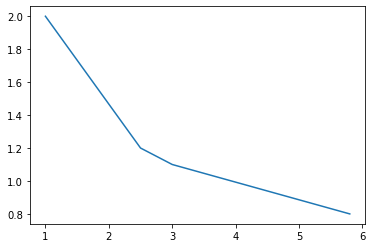

In [57]:
x = np.array([1, 2.5, 3, 5.8])
y = np.array([2, 1.2, 1.1, 0.8])

## Import the module, assign a short alias, and direct the graphical output to this notebook
import matplotlib.pyplot as plt 
%matplotlib inline

## This function generates a Figure and a single Axes on that figure
## We assing them names fig and ax.
fig, ax = plt.subplots()

## Plots the data on the Axes object
ax.plot(x,y);

The plot produced by this basic use of the $\texttt{plot}$ method has connected the data point coordinates with lines.  This is the *default* behavior of this function.  It is common for Matplotlib functions (and functions in many other Python libraries) to have a default functionality which is produced by supplying the minimum number of arguments. Typically additional arguments can be supplied which alter this default functionality.  In our example, we can supply the optional argument $\texttt{'b+'}$ to the $\texttt{plot}$ method to produce a plot with blue $+$ symbols at the data coordinates instead of lines connecting them.   

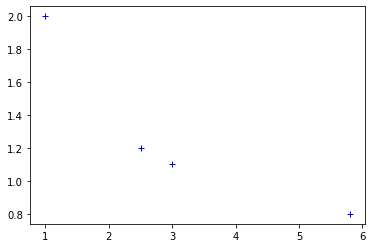

In [59]:
fig, ax = plt.subplots()
ax.plot(x,y,'b+');

Another alternative when we interested in plotting data points is the $\texttt{scatter}$ method, for which we can use the same syntax.

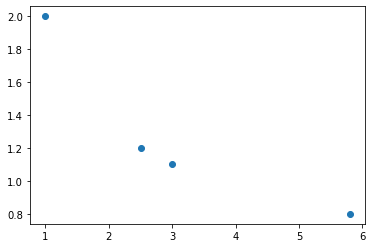

In [60]:
fig, ax = plt.subplots()
ax.scatter(x,y);

Next, we show how to configure some of the elements in such a plot by using methods of the Axes.

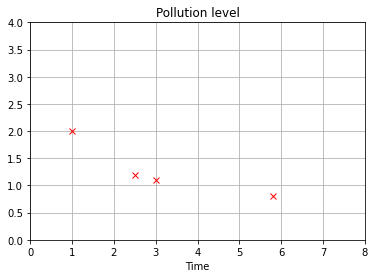

In [62]:
fig, ax = plt.subplots()
ax.plot(x,y,'rx');

## These options set the upper and lower boundaries for x and y.
ax.set_xlim(0,8);
ax.set_ylim(0,4);

## This option displays a grid to help visualize the coordinates
ax.grid(True);

## These options are used to set labels for the axes
ax.set_xlabel('Time');
ax.set_label('Concentration');
ax.set_title("Pollution level");

In more sophisticated settings, we might want multiple Axes objects in one Figure.  In this case we can supply two arguments to $\texttt{subplots}$ to specify the number of rows and columns of subplots we want, and we are supplied with a *list* of Axes objects. In order to manipulate the settings for each *subplot*, we have to use a method of the corresponding Axes object.  The names of these methods are similar but not quite the same as the functions we used in the previous figures.

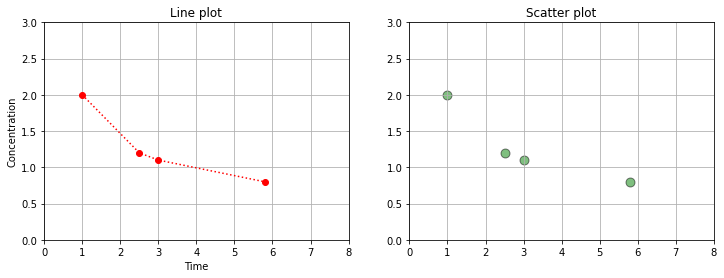

In [53]:
fig, ax = plt.subplots(1,2)

## Construct and configure plot for first Axes
ax[0].plot(x,y,'r',ls=':',marker='o');

ax[0].set_xlim(0,8);
ax[0].set_ylim(0,3);
ax[0].grid(True);

ax[0].set_xlabel('Time');
ax[0].set_ylabel('Concentration');
ax[0].set_title("Line plot");

## Construct and configure plot for second Axes
ax[1].scatter(x,y,alpha=0.5,color='green',edgecolor="black",s=80);
ax[1].set_xlim(0,8);
ax[1].set_ylim(0,3);
ax[1].grid(True);
ax[1].set_title("Scatter plot");

## We adjust the width of the entire Figure to make room for each Axes
fig.set_figwidth(12)

#### Example 2

In this example we will plot the graph of a function, say $y(x)=\sin{\pi x}$, for $x$ in an interval, say $[-2,4]$.  In order to make use of the same method, we will need to generate a set of points that lie on the curve for $x$ in the given interval.  The NumPy method $\texttt{linspace}$ provides an easy way to produce our points.  This method creates a NumPy array object with entries spaced evenly over a specified interval. 

In [54]:
## This call to linspace produces an array of 9 numbers evenly spaced on the interval [-2,4]
x = np.linspace(-2,4,9)
print(x)

[-2.   -1.25 -0.5   0.25  1.    1.75  2.5   3.25  4.  ]


For this figure we will use some other options to adjust the appearance of this plot, including configuration of the *ticks* along the $x$ and $y$ axes.  The *ticks* are lists of numbers that define the gridlines and numerical labels along the axes.  The $\texttt{plot}$ method will provide default values of *ticks*, which can be changed by providing an array of new values.   

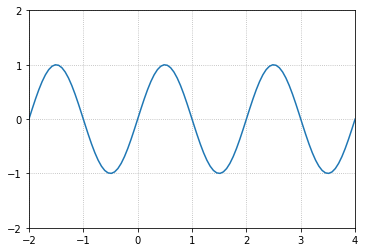

In [64]:
x = np.linspace(-2,4,100)
## We can an array of the corresponding y values by using the array x in an algebraic expression
y = np.sin(x*np.pi)

fig, ax = plt.subplots()
ax.plot(x,y)

ax.set_xlim(-2,4);
ax.set_ylim(-2,2);

## The grid option will accept the keyword argument ls, which specifies the linestyle
ax.grid(True,ls='dotted');

## This option adjusts the aspect ratio so that the x and y axes have the same length scale
ax.set_aspect('equal');

## This option specifies the ticks with lists produced by range.
## If we want noninteger values, we can use linspace to produce a list of tick locations.
ax.set_xticks(range(-2,5));
ax.set_yticks(range(-2,3));

Let's plot the function, together with its derivative.  We'll also include a legend to distinguish between the curves, and add lines at the coordinate axes.

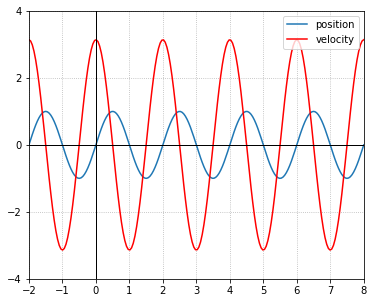

In [31]:
x = np.linspace(-2,8,200)
y = np.sin(x*np.pi)
y_prime = np.pi*np.cos(x*np.pi)

fig, ax = plt.subplots()

# We include the keyword label to assign a name to be include in the legend.
ax.plot(x,y,label='position');
ax.plot(x,y_prime,color='red',label='velocity');

# A call to the legend method generates a lengend.  
# Keyword parameters may be included to change the default behavior.
ax.legend();


## This option draws lines x=0 and y=0 using keyword arguments color and linewidth.
ax.axvline(color='k',linewidth = 1);
ax.axhline(color='k',linewidth = 1);


## These options we have seen already.
ax.set_xlim(-2,8);
ax.set_ylim(-4,4);

ax.grid(True,ls='dotted');
ax.set_aspect('equal');
ax.set_xticks(np.linspace(-2,8,11));
ax.set_yticks(np.linspace(-4,4,5));

fig.set_figheight(8)

### Example 3

In this example we create a histogram to visualize the normal distribution.

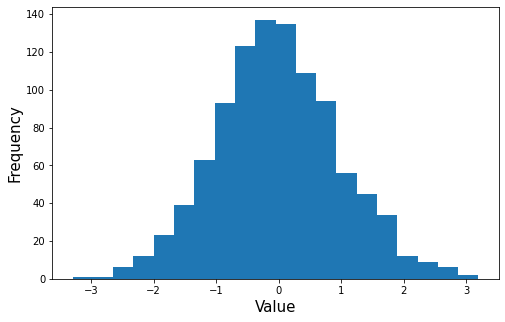

In [108]:
## We generate an array with 1000 entries from the standard normal distribution.
z_data = np.random.normal(size=1000)

fig, ax = plt.subplots()

## This hist method produces a histogram.
ax.hist(z_data,bins=20);

## We can use the same Axes setting as in earlier examples.
ax.set_xlabel('Value',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
fig.set_figwidth(8)
fig.set_figheight(5)

To get a bit more control over the bins we can specify a list or array that contains the bin edges, instead of the number of bins.  We can also adjust the bar widths and add horizontal grid lines to make the plot easier to read.  

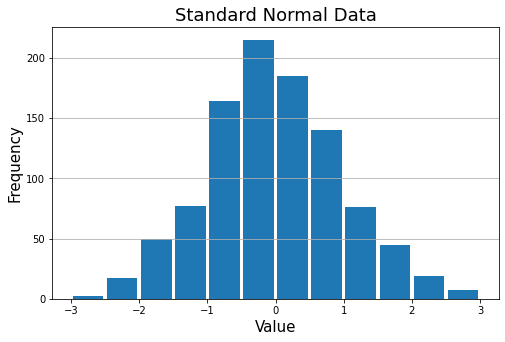

In [109]:
fig, ax = plt.subplots()

ax.hist(z_data,bins=np.linspace(-3,3,13),rwidth=0.9);
ax.grid(axis='y')
ax.set_xlabel('Value',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Standard Normal Data',fontsize=18)
fig.set_figwidth(8)
fig.set_figheight(5)

### Example 4

The final plot is a replication of one featured in a [very cool video](https://www.youtube.com/watch?v=EK32jo7i5LQ) from the 3Blue1Brown channel.  The plot shows points with polar coordinates $(p,p)$ for $p$ a prime.  In this plot we play with the color a bit and set the ticks to an empty list to prevent them being drawn.  Note the color from the XKCD list of [most popular RGB colors](https://xkcd.com/color/rgb/).  All of the colors on the list are available in matplotlib.

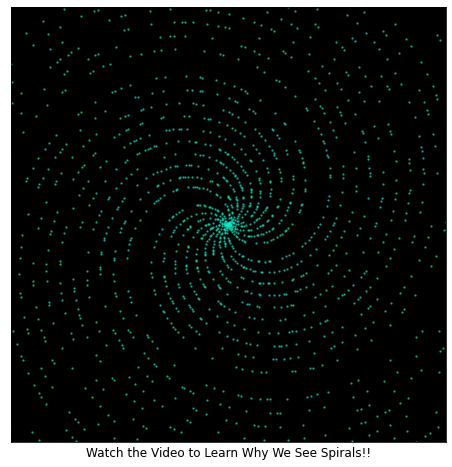

In [110]:
## Generate a list of the primes less than N
primes = []
N = 15000
for i in range(1,N):
    for j in range(2,i):
        if (i%j == 0):
            break
    else:
        primes.append(i)

P = np.array(primes)

## Plot
fig,ax = plt.subplots(1,1)
ax.scatter(P*np.cos(P),P*np.sin(P),color="xkcd:aqua",alpha = 0.5,s=2)

## Set colors, aspect ratio, and title
ax.set_xlim(-11000,11000)
ax.set_ylim(-11000,11000)
ax.set_facecolor("black")
ax.set_aspect('equal')
ax.set_title("Watch the Video to Learn Why We See Spirals!!",fontsize=12,y=0.0,pad = -15)

## Clear the ticks
ax.set_xticks([])
ax.set_yticks([])

## Adjust the size
fig.set_figheight(8)
fig.set_figwidth(12)

### References

- [A Crash Course in Python for Scientists](https://nbviewer.jupyter.org/gist/rpmuller/5920182)


- [A Gallery of Interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
